In [7]:
# Template Notebook cho Data Preparation - Milestone 1
# Thành viên: NGUYỄN VĂN CHIẾN - Dataset: THE UCI HEART DISEASE DATASET

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

# Import utilities
import sys
sys.path.append('../src/')
from visualization_utils import create_standard_plots, plot_class_distribution, plot_split_distributions

# ==========================================
# 1. LOAD AND EXPLORE DATA
# ==========================================

print("="*50)
print("1. LOAD AND EXPLORE DATA")
print("="*50)

# Load dataset
col_names= ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
             'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

data = pd.read_csv('../datasets/heart_disease/heart.csv', header=None, names=col_names)

# Display dataset information
print(f"Dataset shape: {data.shape}")
print("\nDataset info:")
print(data.info())
print("\nFirst 5 rows:")
print(data.head())

# Check missing values
print("\nMissing values:")
print(data.isnull().sum())

# Check '?' values -> missing data
print("\nChecking for '?' values:")
for col in data.columns:
    question_marks = (data[col] == '?').sum()
    if question_marks > 0:
        print(f"Column '{col}' has {question_marks} '?' values")

# Descriptive statistics
print("\nDescriptive statistics:")
print(data.describe())

1. LOAD AND EXPLORE DATA
Dataset shape: (303, 14)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB
None

First 5 rows:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      

In [8]:
# ==========================================
# 2. DATA PREPROCESSING
# ==========================================

print("="*50)
print("2. DATA PREPROCESSING")
print("="*50)

# Replace '?' with NaN
data = data.replace('?', np.nan)

# Convert columns to appropriate types
for col in ['ca', 'thal']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Handle missing values
data = data.dropna()

# Check class distribution
# =============================================
# Convert target to int
data['target'] = data['target'].astype(int)

# Check class distribution
print("\nClass distribution:")
print(data['target'].value_counts())
print("Class proportions:")
print(data['target'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')

# Check target values and their meaning
target_values = sorted(data['target'].unique())
print(f"\nTarget values: {target_values}")
print("0: <50% diameter narrowing (no heart disease)")
print("1-4: >50% diameter narrowing (heart disease)")

# Simplify target to binary classification if needed
data['target_binary'] = data['target'].apply(lambda x: 0 if x == 0 else 1)
print("\nBinary target distribution:")
print(data['target_binary'].value_counts())
print("Binary class proportions:")
print(data['target_binary'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')
# ============================================

# Prepare features and target
X = data.drop(['target', 'target_binary'], axis=1)
y = data['target_binary']

print("Features shape:", X.shape)
print("Target shape:", y.shape)

2. DATA PREPROCESSING

Class distribution:
target
0    160
1     54
2     35
3     35
4     13
Name: count, dtype: int64
Class proportions:
target
0    53.87%
1    18.18%
2    11.78%
3    11.78%
4     4.38%
Name: proportion, dtype: object

Target values: [0, 1, 2, 3, 4]
0: <50% diameter narrowing (no heart disease)
1-4: >50% diameter narrowing (heart disease)

Binary target distribution:
target_binary
0    160
1    137
Name: count, dtype: int64
Binary class proportions:
target_binary
0    53.87%
1    46.13%
Name: proportion, dtype: object
Features shape: (297, 13)
Target shape: (297,)


3. VISUALIZE CLASS DISTRIBUTION


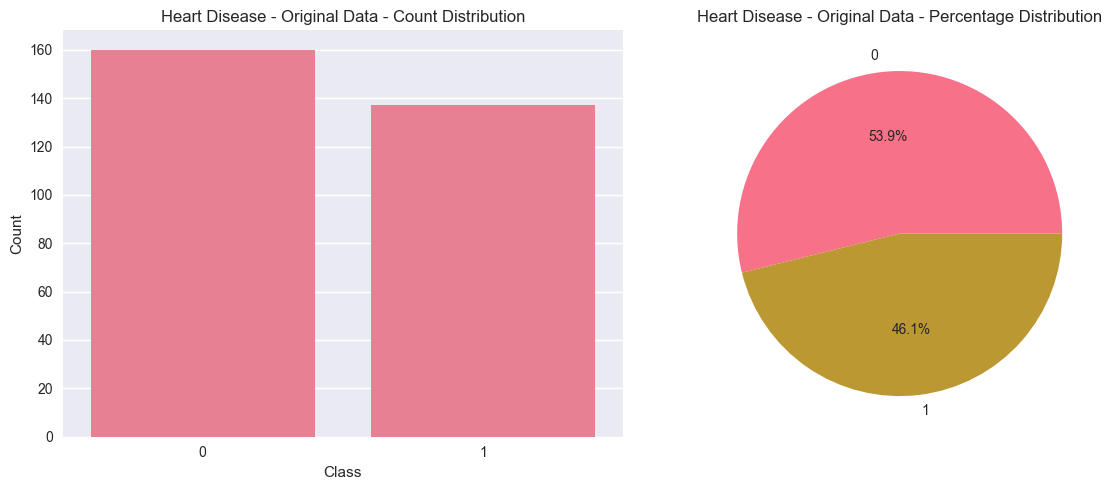


Heart Disease - Original Data Class Distribution:
target_binary
0    160
1    137
Name: count, dtype: int64
Class proportions:
target_binary
0    53.87
1    46.13
Name: count, dtype: float64%


In [9]:
# ==========================================
# 3. VISUALIZE CLASS DISTRIBUTION
# ==========================================

print("="*50)
print("3. VISUALIZE CLASS DISTRIBUTION")
print("="*50)

dataset_name = "Heart Disease"
target_col = "target_binary"

plot_class_distribution(data, target_col, f'{str(dataset_name)} - Original Data',
                      f'../visualizations/heart_disease/original_distribution.png')

In [10]:
# ==========================================
# 4. SPLIT DATA INTO 4 DIFFERENT RATIOS
# ==========================================

print("\n" + "="*50)
print("4. SPLIT DATA INTO 4 DIFFERENT RATIOS")
print("="*50)

# Define split ratios
split_ratios = {
    '40/60': 0.4,
    '60/40': 0.6, 
    '80/20': 0.8,
    '90/10': 0.9
}

# Dictionary to store splits
data_splits = {}
target_splits = {}

# Perform stratified splits for each ratio
for ratio_name, train_size in split_ratios.items():
    print(f"\nSplitting data with ratio {ratio_name}...")
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        train_size=train_size,
        stratify=y,  # Ensure stratified split
        random_state=42,
        shuffle=True
    )
    
    # Store in dictionary
    data_splits[ratio_name] = (X_train, X_test)
    target_splits[ratio_name] = (y_train, y_test)
    
    # Print split information
    print(f"Train size: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
    print(f"Test size: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")
    print(f"Train class distribution:\n{y_train.value_counts()}")
    print(f"Test class distribution:\n{y_test.value_counts()}")


4. SPLIT DATA INTO 4 DIFFERENT RATIOS

Splitting data with ratio 40/60...
Train size: 118 (39.7%)
Test size: 179 (60.3%)
Train class distribution:
target_binary
0    64
1    54
Name: count, dtype: int64
Test class distribution:
target_binary
0    96
1    83
Name: count, dtype: int64

Splitting data with ratio 60/40...
Train size: 178 (59.9%)
Test size: 119 (40.1%)
Train class distribution:
target_binary
0    96
1    82
Name: count, dtype: int64
Test class distribution:
target_binary
0    64
1    55
Name: count, dtype: int64

Splitting data with ratio 80/20...
Train size: 237 (79.8%)
Test size: 60 (20.2%)
Train class distribution:
target_binary
0    128
1    109
Name: count, dtype: int64
Test class distribution:
target_binary
0    32
1    28
Name: count, dtype: int64

Splitting data with ratio 90/10...
Train size: 267 (89.9%)
Test size: 30 (10.1%)
Train class distribution:
target_binary
0    144
1    123
Name: count, dtype: int64
Test class distribution:
target_binary
0    16
1    14
N


5. VISUALIZE SPLIT DISTRIBUTIONS


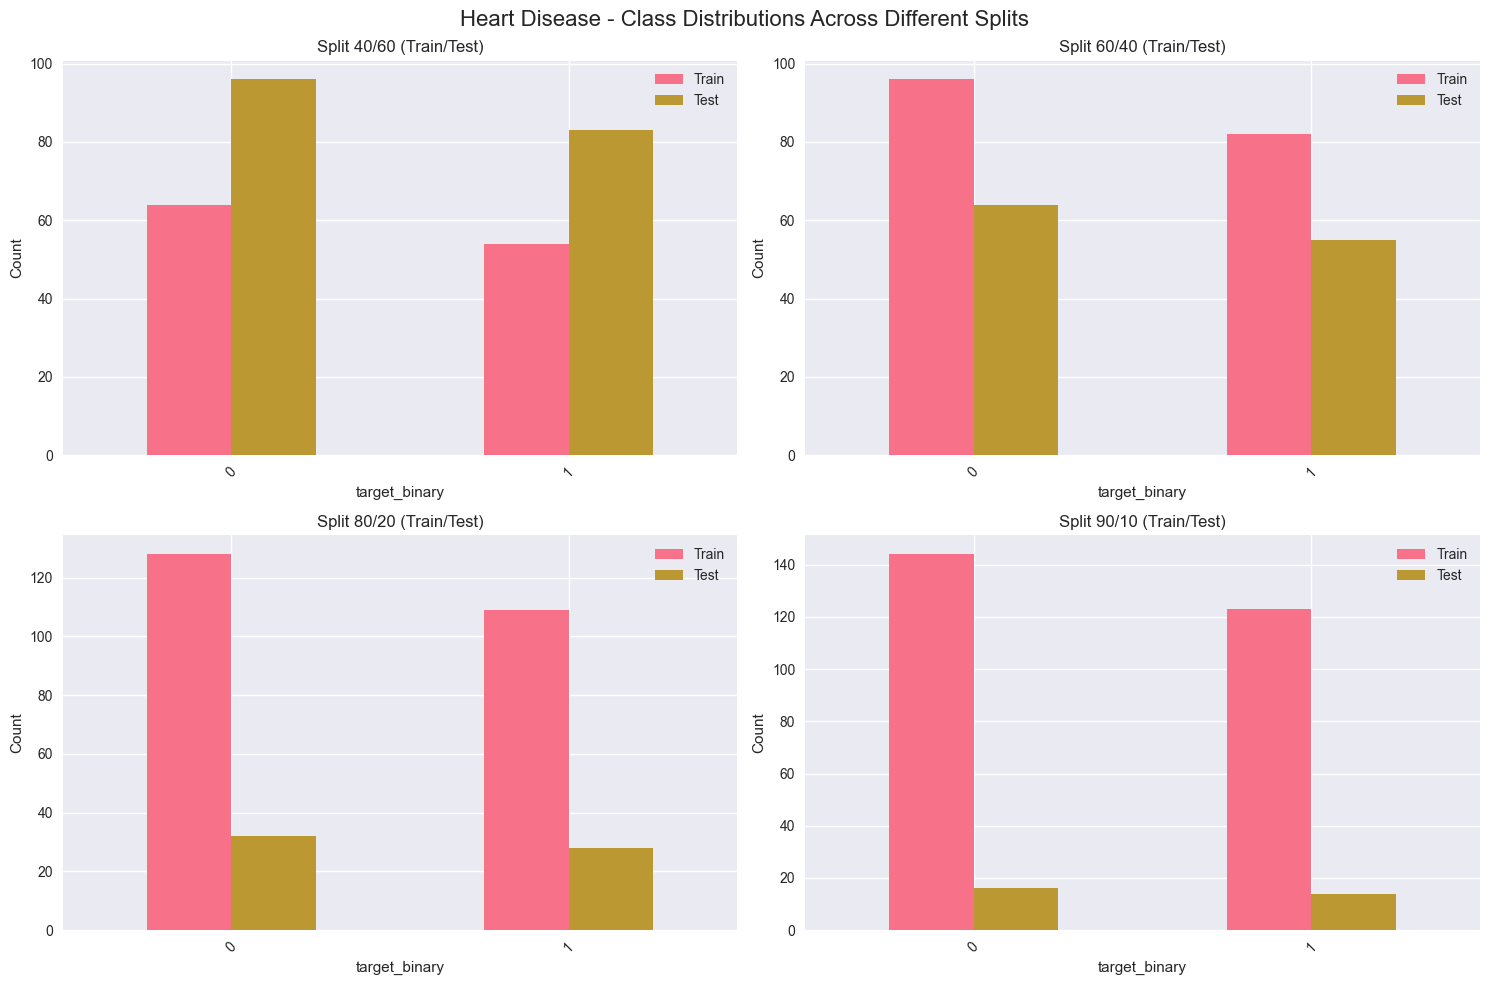

In [11]:
# ==========================================
# 5. VISUALIZE SPLIT DISTRIBUTIONS  
# ==========================================

print("\n" + "="*50)
print("5. VISUALIZE SPLIT DISTRIBUTIONS")
print("="*50)

# Prepare data for visualization
splits_for_viz = {}
for ratio_name in split_ratios.keys():
    y_train, y_test = target_splits[ratio_name]
    splits_for_viz[ratio_name] = (y_train, y_test)

# Plot distribution comparisons
plot_split_distributions(splits_for_viz, dataset_name, 
                        f'../visualizations/heart_disease/split_distributions.png')

In [12]:
# ==========================================
# 6. SAVE RESULTS
# ==========================================

print("\n" + "="*50)
print("6. SAVE RESULTS")
print("="*50)

# Create output directory
import os
output_dir = '/results/heart_disease'
os.makedirs(output_dir, exist_ok=True)

# Save splits for Milestone 2
import pickle

with open(f'{output_dir}/data_splits.pkl', 'wb') as f:
    pickle.dump({
        'data_splits': data_splits,
        'target_splits': target_splits,
        'original_data': (X, y),
        'dataset_info': {
            'name': dataset_name,
            'shape': data.shape,
            'features': list(X.columns),
            'target': target_col,
            'classes': sorted(y.unique().tolist())
        }
    }, f)

print(f"✅ Data splits saved to {output_dir}/data_splits.pkl")

# Create summary report
summary_stats = []
for ratio_name in split_ratios.keys():
    y_train, y_test = target_splits[ratio_name]
    summary_stats.append({
        'Split Ratio': ratio_name,
        'Train Size': len(y_train),
        'Test Size': len(y_test),
        'Train Class 0': (y_train == 0).sum(),
        'Train Class 1': (y_train == 1).sum(),
        'Test Class 0': (y_test == 0).sum(), 
        'Test Class 1': (y_test == 1).sum()
    })

summary_df = pd.DataFrame(summary_stats)
summary_df.to_csv(f'{output_dir}/split_summary.csv', index=False)
print(f"✅ Summary saved to {output_dir}/split_summary.csv")

# Display summary
print("\nSplit Summary:")
print(summary_df)

print("\n" + "="*50)
print("COMPLETED ✅")
print("="*50)
print(f"Dataset: {dataset_name}")
print(f"Original samples: {len(data)}")
print(f"Features: {X.shape[1]}")
print(f"Classes: {len(y.unique())}")
print(f"Splits created: {len(split_ratios)}")
print(f"Output directory: {output_dir}")
print("="*50)


6. SAVE RESULTS
✅ Data splits saved to /results/heart_disease/data_splits.pkl
✅ Summary saved to /results/heart_disease/split_summary.csv

Split Summary:
  Split Ratio  Train Size  Test Size  Train Class 0  Train Class 1  \
0       40/60         118        179             64             54   
1       60/40         178        119             96             82   
2       80/20         237         60            128            109   
3       90/10         267         30            144            123   

   Test Class 0  Test Class 1  
0            96            83  
1            64            55  
2            32            28  
3            16            14  

COMPLETED ✅
Dataset: Heart Disease
Original samples: 297
Features: 13
Classes: 2
Splits created: 4
Output directory: /results/heart_disease
